# Selección de Características

Utilizaremos el dataset "Titanic - Machine Learning from Disaster" de Kaggle, que contiene tanto variables numéricas como categóricas.

▶ Enlace: https://www.kaggle.com/datasets/yasserh/titanic-dataset

📌 Pasos en el notebook:

1. Cargar los datos de Kaggle
2. Exploración y preprocesamiento
3. Feature Selection (usando mutual_info_classif y SelectKBest)
3. Dimensionality Reduction (PCA y t-SNE)
4. Visualización de los resultados


🔹 Feature Selection → mutual_info_classif

🔹 PCA y t-SNE → para reducir dimensiones y visualizar los datos

🔹 Manejo de variables categóricas → LabelEncoder y get_dummies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

##1. Cargar dataset Titanic de Kaggle

In [ ]:
titanic_url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(titanic_url)

## 2. Exploración rápida de los datos

In [ ]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                      

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 3. Preprocesamiento de datos

Eliminar columnas irrelevantes o con demasiados valores faltantes.

In [ ]:
df.drop(columns=["Name", "Ticket", "Cabin"], inplace=True)

In [ ]:
df["Age"].unique()

array([22.  , 38.  , 26.  , 35.  , 24.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 46.  , 59.  , 71.  ,
       37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
       55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
       20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
       10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
       24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [ ]:
df["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

### Manejo de valores faltantes

In [ ]:
imputer = SimpleImputer(strategy="most_frequent")
df["Age"] = imputer.fit_transform(df[["Age"]])
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

<ipython-input-5-1ec93cc6dbdc>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)


### Codificar variables categóricas

* La variable `"Sex" `se transforma de *categórica/ cualitativa* a **numérica**.
* La variable `"Embarked"` se transforma de *categórica/ cualitativa a* **binaria**.


In [ ]:
label_enc = LabelEncoder()
df["Sex"] = label_enc.fit_transform(df["Sex"])
df = pd.get_dummies(df, columns=["Embarked"], drop_first=True)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,1,0,3,1,22.0,1,0,7.2500,False,True
1,2,1,1,0,38.0,1,0,71.2833,False,False
2,3,1,3,0,26.0,0,0,7.9250,False,True
3,4,1,1,0,35.0,1,0,53.1000,False,True
4,5,0,3,1,35.0,0,0,8.0500,False,True


### Separar variables predictoras y objetivo

In [ ]:
X = df.drop(columns=["Survived"])
y = df["Survived"]

### Estandarización de los datos

Sobre `StandardScaler` de `scikit-learn`:


* **Escalado de Características**: `StandardScaler` estandariza las características de un conjunto de datos, eliminando la media y escalando a la varianza unitaria.
* **Centrado en Cero**: Transforma las características para que tengan una media de 0.
* **Varianza Unitaria**: Escala las características para que tengan una desviación estándar de 1.
* **Fórmula**: Aplica la fórmula z = (x - μ) / σ, donde x es el valor original, μ es la media y σ es la desviación estándar.
* **Importancia**: Es útil para algoritmos sensibles a la escala de las características, como k-vecinos más cercanos, regresión lineal con regularización, máquinas de vectores de soporte, etc.

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 4. Feature Selection con Mutual Information

Uso de la clase **SelectKBest** de `scikit-learn`.

* SelectKBest se utiliza para seleccionar las **k mejores características** de un conjunto de datos según una métrica de puntuación específica.

* Funciona como un **método de filtro**, evaluando la importancia de cada característica de forma independiente y seleccionando las k mejores.

* Permite utilizar diferentes métricas de puntuación, como `chi-cuadrado` (chi2) para variables **categóricas** o `f_regression` (f_regression) para variables **numéricas**.

* El **parámetro principal es k**, que especifica el número de características que se van a seleccionar.

* Se puede integrar fácilmente en un *pipeline* de `scikit-learn` para automatizar el proceso de selección de características junto con otros pasos de preprocesamiento y modelado.


▶ Más sobre **SelectKBest**: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html


In [ ]:
selector = SelectKBest(score_func=mutual_info_classif, k=5)
X_selected = selector.fit_transform(X_scaled, y)
selected_features = X.columns[selector.get_support()]
print("Características seleccionadas:", selected_features)

Características seleccionadas: Index(['Pclass', 'Sex', 'Age', 'Fare', 'Embarked_S'], dtype='object')


## 5. Reducción de Dimensionalidad con PCA

### PCA: Análisis de Componentes Principales

* **Transformación Lineal**: PCA es una técnica de transformación lineal que busca proyectar los datos a un *nuevo espacio de menor dimensión*.

* **Maximización de Varianza**: El objetivo principal es encontrar las direcciones (componentes principales) que capturen la mayor cantidad de *varianza* posible en los datos originales.

* **Componentes Principales**: Los componentes principales son *combinaciones lineales de las características originales*, ordenadas por la cantidad de varianza que explican.

* **Reducción de Dimensionalidad**: Al seleccionar solo los primeros componentes principales (los que más varianza explican), se reduce la dimensionalidad del conjunto de datos.

* **Aplicaciones**: PCA se utiliza en diversas áreas como visualización de datos, compresión de datos, extracción de características y preprocesamiento para modelos de machine learning.

En resumen, PCA es una técnica poderosa para reducir la dimensionalidad de los datos, preservando la mayor cantidad de información relevante posible.

▶ Más sobre https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

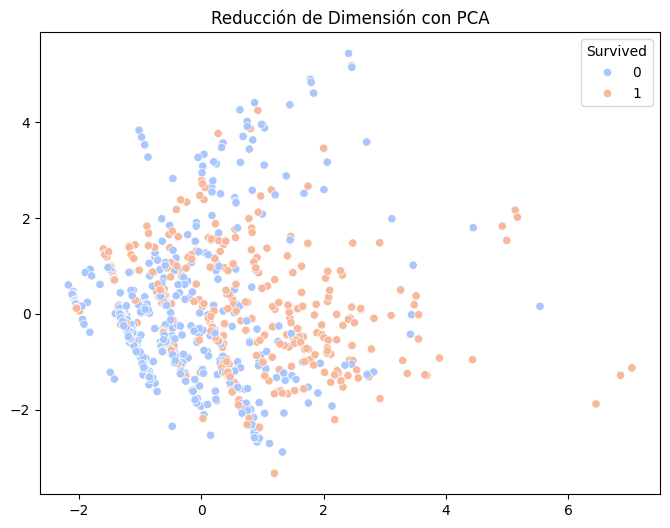

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

#gráfica de dispresión
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette="coolwarm")
plt.title("Reducción de Dimensión con PCA")
plt.show()


## 6. Reducción de Dimensionalidad con t-SNE

* **Visualización de Datos**: t-SNE es una técnica de reducción de dimensionalidad no lineal que se utiliza principalmente para visualizar datos de alta dimensión en espacios de 2 o 3 dimensiones.
* **Preservación de Vecindades**: Se enfoca en preservar las relaciones de vecindad entre los puntos de datos, lo que significa que los puntos similares en el espacio de alta dimensión tienden a estar cerca en el espacio de baja dimensión.
* **No Lineal**: A diferencia de PCA, t-SNE es una técnica no lineal, lo que le permite capturar estructuras complejas en los datos que PCA podría no detectar.
Parámetros: Requiere ajustar parámetros como la perplejidad (relacionada con el número de vecinos cercanos) y la tasa de aprendizaje para obtener resultados óptimos.
* **Interpretación**: Los resultados de t-SNE deben interpretarse con cuidado, ya que la forma en que se agrupan los puntos puede verse afectada por los parámetros y no siempre refleja la estructura global de los datos.

En resumen, t-SNE es una herramienta poderosa para explorar y visualizar datos de alta dimensión, pero *es importante comprender sus limitaciones* y ajustar los parámetros adecuadamente.

▶ Más sobre: https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

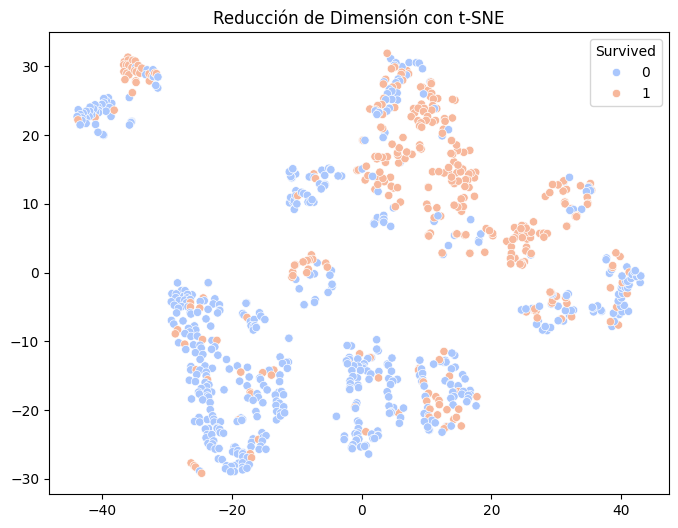

In [ ]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)


#gráfica de dispresión
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=y, palette="coolwarm")
plt.title("Reducción de Dimensión con t-SNE")
plt.show()
